### Визуализация датасета

В графиках использовать основные цвета сайта hh.ru

In [1]:
import random
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [2]:
warnings.filterwarnings("ignore")

#### Палитра

[Ссылка на брэндбук](http://cn.actionpay.ru/documents/14/97/01/14970149648666.pdf)

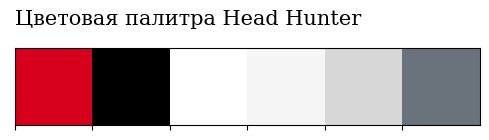

In [3]:
# Palette.
sns.palplot(['#d6001c', '#000000', '#ffffff','#f5f5f5', '#d7d7d7', '#6a737b'])
plt.title("Цветовая палитра Head Hunter", loc='left', fontfamily='serif', fontsize=15,y=1.2)
plt.show()

#### Данные

In [4]:
df = pd.read_csv('DataEngineer.csv')
df['Company Name'] = df['Company Name'].map(lambda x: x.split('\n')[0])
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: int(x.split('(')[0].split('K-')[0].replace('$', ''))).astype('float')
df['Headquarters'] = df['Headquarters'].replace('-1', 'Not specified')
df['Sector'] = df['Sector'].replace('-1', 'Not specified')
df['Rating'] = df['Rating'].astype('float')

#### 1. Построить график компаний с самым большим кол-вом вакансий

In [5]:
data = df['Company Name'].value_counts()[:10]

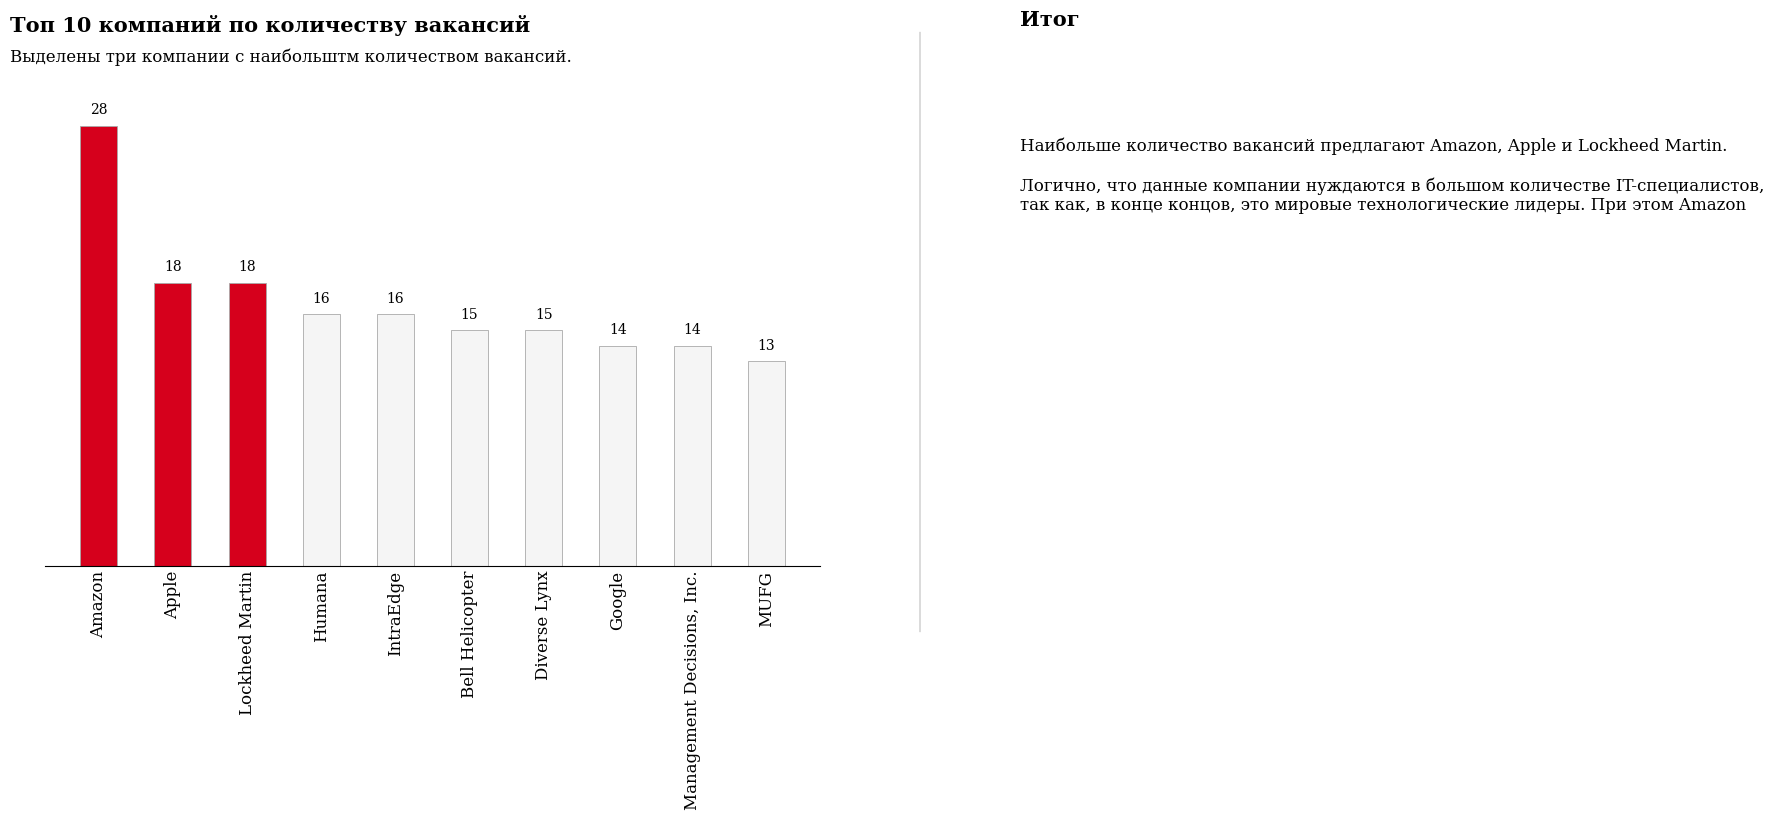

In [6]:
# Color map.
color_map = ['#f5f5f5' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # color highlight
# Plot.
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(data.index, data, width=0.5, edgecolor='darkgray', linewidth=0.6, color=color_map)
# Annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 1), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)
ax.set_yticklabels([])
# Title and sub-title
fig.text(0.09, 1, 'Топ 10 компаний по количеству вакансий', fontsize=15, 
         fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три компании с наибольштм количеством вакансий.', 
         fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Наибольше количество вакансий предлагают Amazon, Apple и Lockheed Martin.

Логично, что данные компании нуждаются в большом количестве IT-специалистов, 
так как, в конце концов, это мировые технологические лидеры. При этом Amazon
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.set_axisbelow(True)
#Axis labels
ax.tick_params(axis='both', which='major', labelsize=12)
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black', lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis=u'both', which=u'both', length=0)
plt.show()

#### 2. Построить график самых популярный названий в вакансиях

In [7]:
data = df['Job Title'].value_counts()[:10].sort_values(ascending=True)

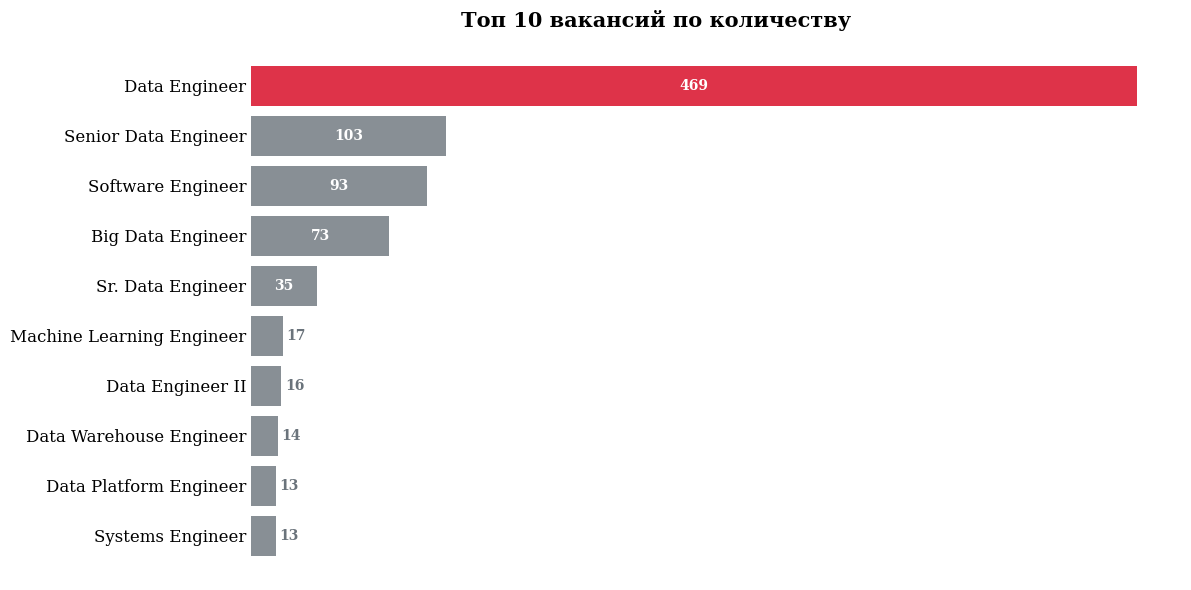

In [8]:
color_map = ['#6a737b' for _ in range(10)]
color_map[-1] = '#d6001c'
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
ax.barh(data.index, data, alpha=0.8, label='Movie', color=color_map)
ax.set_xticks([])
ax.set_yticklabels(data.index, fontfamily='serif', fontsize=11)
for i in data.index[:5]:
    ax.annotate(f"{data[i]}", 
                   xy=(data[i] + 7, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='#6a737b')
for i in data.index[5:]:
    ax.annotate(f"{data[i]:}", 
                   xy=(data[i]/2, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='white')
fig.text(0.3, 0.9, 'Топ 10 вакансий по количеству', fontsize=15, fontweight='bold', fontfamily='serif')   
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

#### 3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [9]:
groups = df.groupby('Headquarters').groups
sorted_groups = sorted({k: len(v) for k, v in groups.items()}.items(), key=lambda item: item[1], reverse=True)
top_ten = dict(sorted_groups[:10])

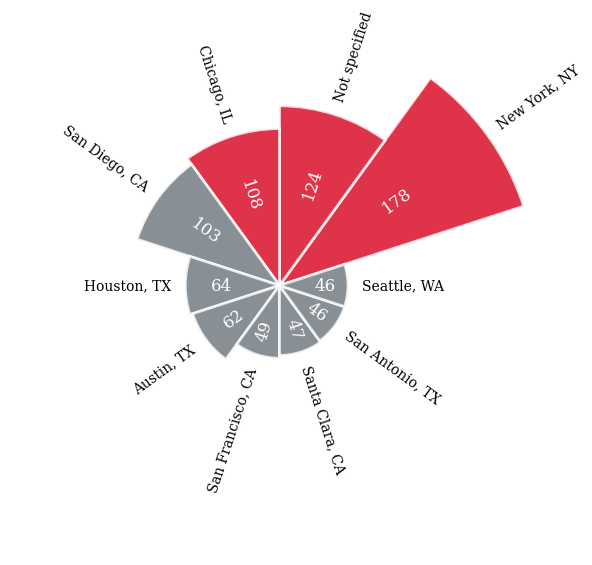

In [10]:
color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # color highlight

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 1
labelPadding = 10
max = np.max(list(top_ten.values()))
slope = (max - lowerLimit) / max
heights = slope * np.array(list(top_ten.values())) + lowerLimit
width = 2*np.pi / len(top_ten)
indexes = list(range(1, len(top_ten)+1))
angles = [element * width for element in indexes]
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=color_map,
    alpha=0.8
)
for bar, angle, height, label, val in zip(bars, angles, heights, list(top_ten.keys()), list(top_ten.values())):
    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)
    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment, fontsize=10, fontfamily='serif',
        va='center',
        rotation=rotation,
        rotation_mode="anchor")

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height()/2,
        s=val,
        ha=alignment, fontsize=12, fontfamily='serif', font='bold', color='white',
        va='center',
        rotation=rotation,
        rotation_mode="anchor")
plt.show()

#### 4. Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [11]:
data = df['Type of ownership'].replace({'-1': 'Other'}).value_counts()[:10].sort_values(ascending=True)/df['Type of ownership'].count()

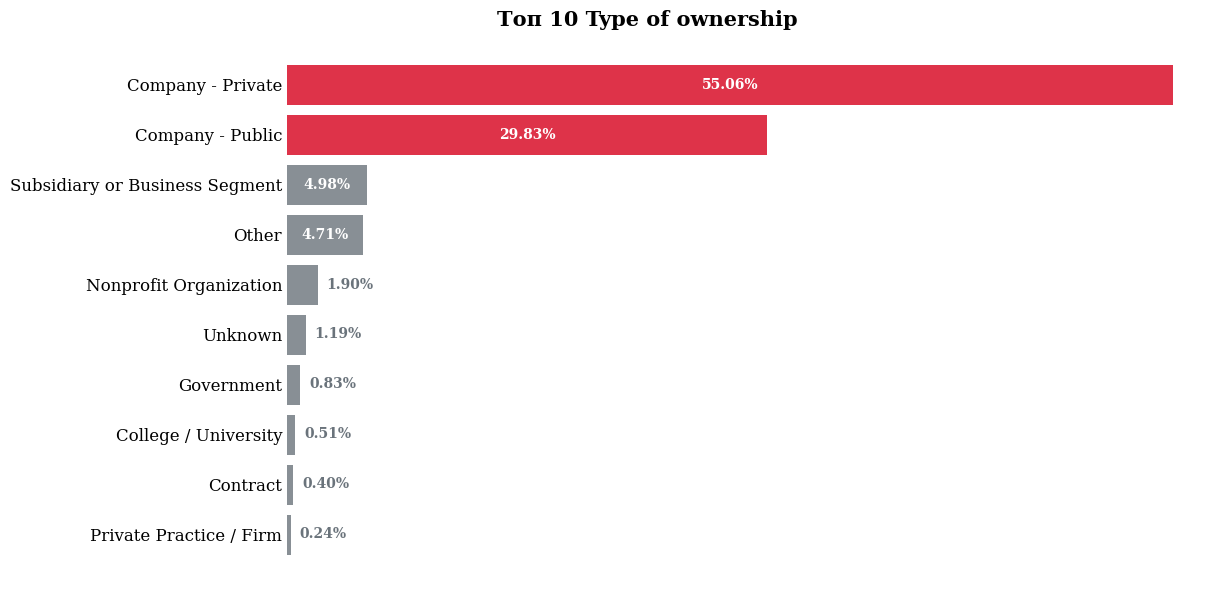

In [12]:
color_map = ['#6a737b' for _ in range(10)]
color_map[-1] = color_map[-2] = '#d6001c'
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
ax.barh(data.index, data, alpha=0.8, label='Movie', color=color_map)
ax.set_xticks([])
ax.set_yticklabels(data.index, fontfamily='serif', fontsize=11)
for i in data.index[:6]:
    ax.annotate(f"{data[i]:.2%}", 
                   xy=(data[i] + 0.02, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='#6a737b')
for i in data.index[6:]:
    ax.annotate(f"{data[i]:.2%}", 
                   xy=(data[i]/2, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='white')
fig.text(0.3, 0.9, 'Топ 10 Type of ownership', fontsize=15, fontweight='bold', fontfamily='serif')   
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

#### 5. Построить график популярности по секторам работы

In [13]:
data_sector = df.groupby(['Sector'])[['Job Title']].agg('count').sort_values(by='Job Title', ascending=False).reset_index()[:10]
data_job = df.groupby(['Job Title'])[['Sector']].agg('count').sort_values(by='Sector', ascending=False).reset_index()[:10]

df_heatmap = df.loc[(df['Sector'].isin(data_sector['Sector'])) & (df['Job Title'].isin(data_job['Job Title']))]
df_heatmap = pd.crosstab(df_heatmap['Sector'],df_heatmap['Job Title'],normalize = "index").T

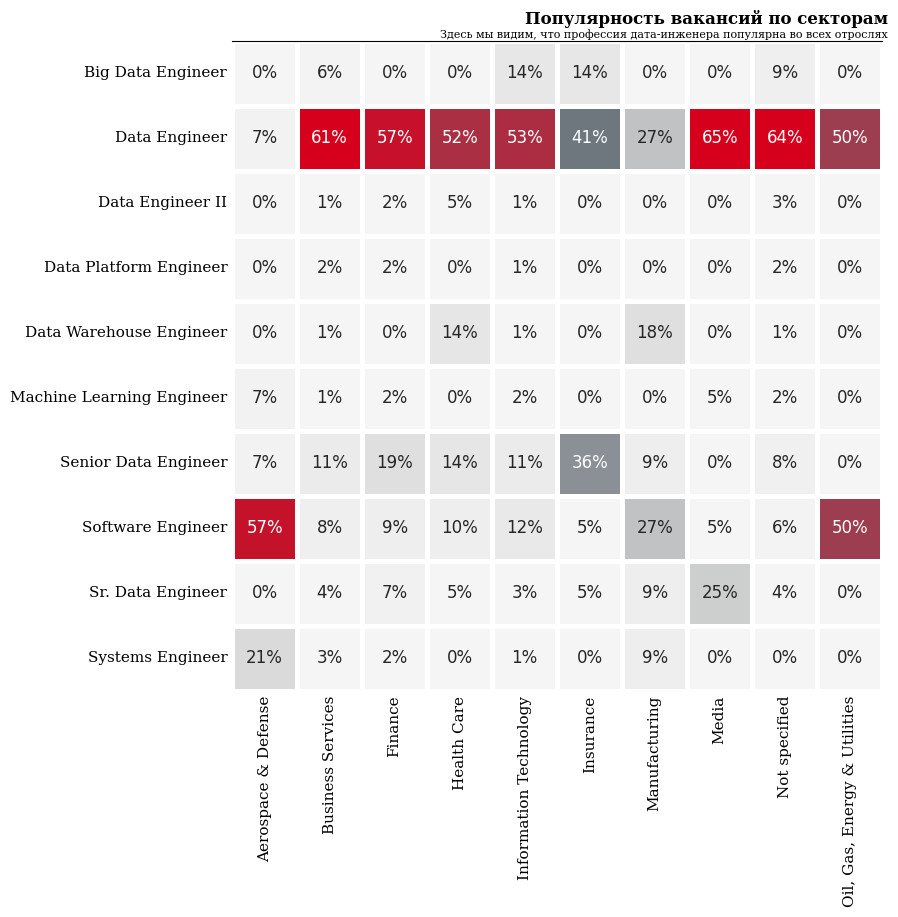

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f5', '#d7d7d7', '#6a737b','#d6001c'])
sns.heatmap(df_heatmap, cmap=cmap,square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
ax.spines['top'].set_visible(True)
fig.text(.99, 1, 'Популярность вакансий по секторам', fontweight='bold', fontfamily='serif', fontsize=12, ha='right')   
fig.text(0.99, 0.985, 'Здесь мы видим, что профессия дата-инженера популярна во всех отрослях',ha='right', fontsize=8, fontfamily='serif') 
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

#### 6. Построить график используя сектора работы и средний уровень зарплат в них

In [15]:
data = df[['Sector', 'Salary Estimate']]
data = data.groupby('Sector')['Salary Estimate'].mean().sort_values(ascending=False)

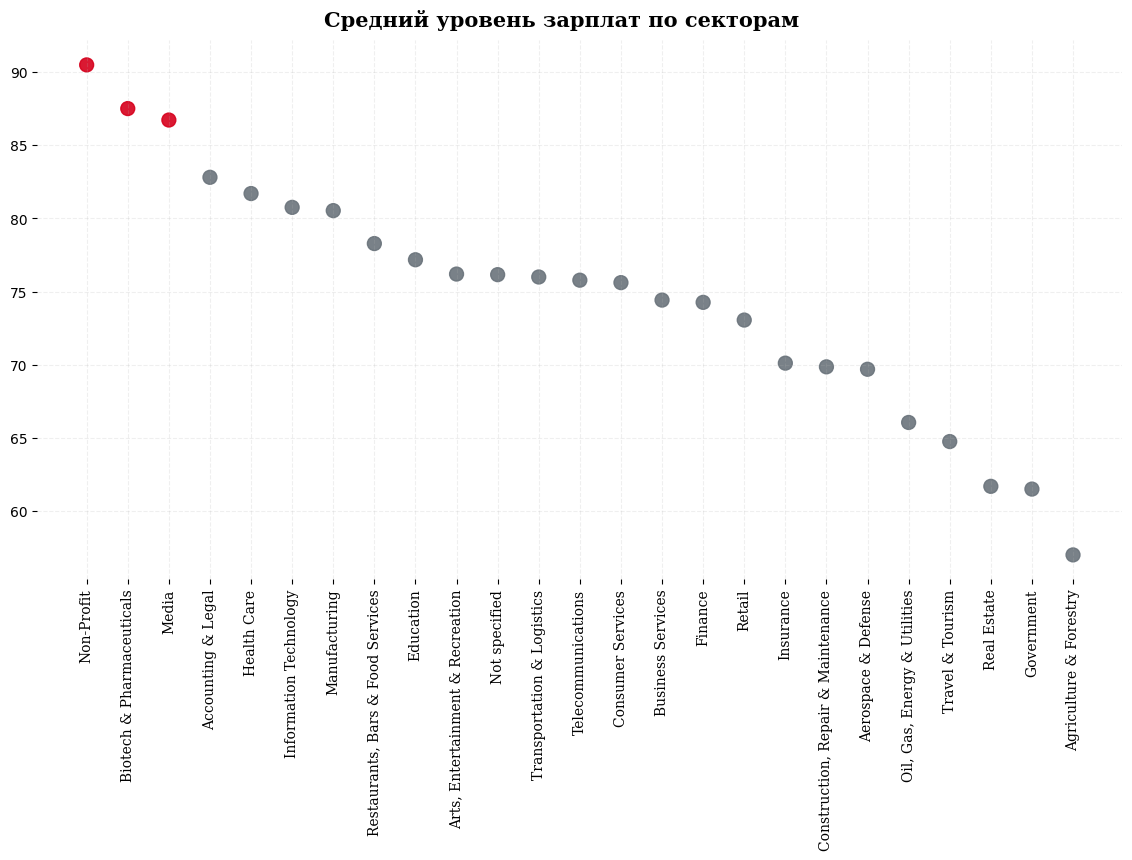

In [16]:
color_map = ['#6a737b' for _ in range(25)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(data.index, data, color=color_map, s=100, alpha=0.9, label='Average release date')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.grid(axis='both', linestyle='--', alpha=0.2)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
    
fig.text(0.33, 0.9, 'Средний уровень зарплат по секторам', fontsize=15, fontweight='bold', fontfamily='serif')
# ax.set_xticks(range(len(sorted_gms)))
ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)
plt.show()

#### 7. Построить гистограмму распределения рейтинга компаний

In [17]:
data = df[df['Rating'] != -1][['Rating']]

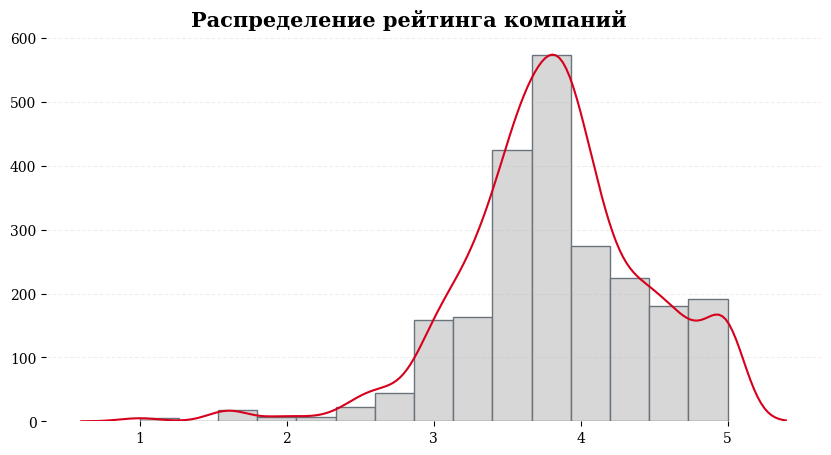

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig.text(0.27, 0.9, 'Распределение рейтинга компаний', fontsize=15, fontweight='bold', fontfamily='serif')
ax.hist(data['Rating'], bins=15, color='#d7d7d7', edgecolor='#6a737b')

ax2 = ax.twinx()
sns.kdeplot(data['Rating'], ax=ax2, color='#d6001c')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.2) 
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif')
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif')
ax2.set_xticklabels(ax.get_xticklabels(), fontfamily='serif')
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_ylabel('')
plt.show()

#### 8. Построить график средних зарплат по популярным компаниям

In [111]:
data = df[df['Rating'] == 5].groupby('Company Name')['Salary Estimate'].mean().sort_values(ascending=True).reset_index()
d1 = data.iloc[:10, :].reset_index(drop=True)
d2 = data.iloc[-10:, :].reset_index(drop=True)
d1['Salary Estimate'] = -d1['Salary Estimate']
d1 = d1.iloc[::-1].reset_index(drop=True)

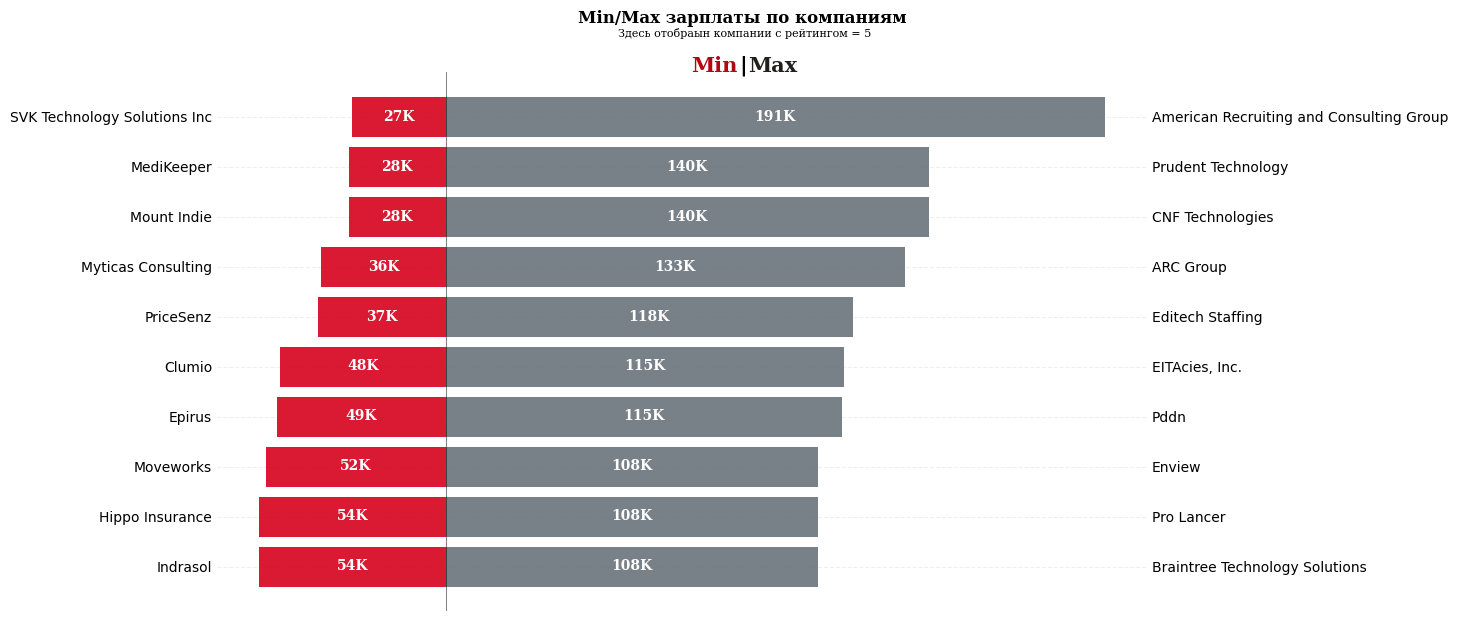

In [148]:
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
fig.text(0.7, 0.95, 'Min/Max зарплаты по компаниям', fontweight='bold', fontfamily='serif', fontsize=12, ha='right')   
fig.text(0.67, 0.93, 'Здесь отобраын компании с рейтингом = 5',ha='right', fontsize=8, fontfamily='serif') 
fig.text(0.52, 0.88, "Min", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.56, 0.88, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.568, 0.88, "Max", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.barh(d2['Company Name'], d2['Salary Estimate'], alpha=0.9, label='Min', color='#6a737b')
ax.axvline(0, color='black', alpha=0.7, linewidth=0.5)
ax2 = ax.twinx()
ax2.barh(d1['Company Name'], d1['Salary Estimate'], alpha=0.9, label='Max', color='#d6001c')
ax2.set_xticklabels([], fontfamily='serif')
ax2.set_xticks([])
ax.tick_params(length=0)
ax2.tick_params(length=0)
ax2.set_yticklabels(d1['Company Name'])
for i in d2.index:
    ax.annotate(f"{d2['Salary Estimate'][i]:.0f}K", 
                   xy=(d2['Salary Estimate'][i]/2, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='white')
for i in d1.index:
    ax2.annotate(f"{-d1['Salary Estimate'][i]:.0f}K", 
                   xy=(d1['Salary Estimate'][i]/2, i),
                   va='center', ha='center', fontsize=10, fontweight='bold', fontfamily='serif', color='white')    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', alpha=0.2)

#### 9. Построить по описанию вакансий облако тегов, исследовать самые популярные слова

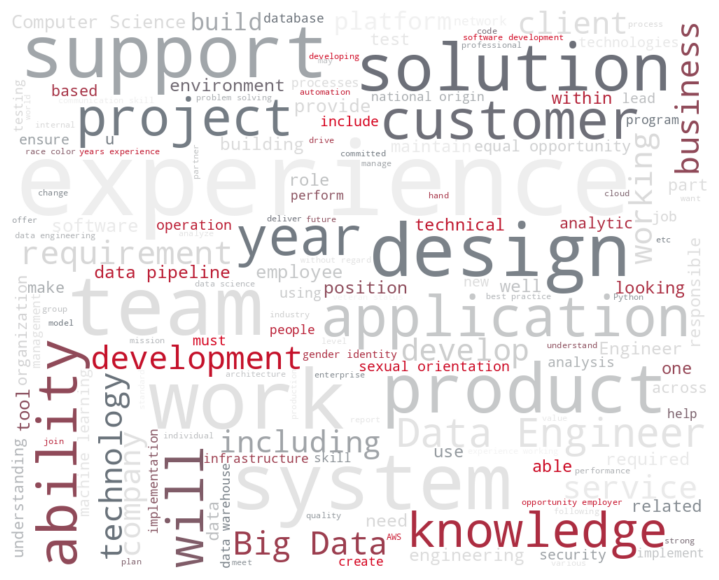

In [29]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f5', '#d7d7d7', '#6a737b','#d6001c'])
text = str(list(df['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('\\n', '')

wordcloud = WordCloud(background_color='white', width=1000, height=800, colormap=cmap, max_words=150).generate(text)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()